# ETL Y EDA sobre las tablas csv descargadas de ENACOM

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")


### LECTURA DE LOS DATOS
Comienzo por la conectividad por localidades ya que me parece que aporta bastante información

In [82]:

df_local=pd.read_csv("data/16-Listadodelocalidadesconconectividadainternet_2750221699377880537.csv")

In [83]:
#observo los datos
df_local.sample(4)

,Provincia,Partido,Localidad,ADSL,Cablemódem,Dial Up,Fibra óptica,4G,3G,Telefonía Fija,Wireless,Satelital
2235,SANTA FE,San Justo,Naré,--,--,--,--,--,--,SI,SI,--
4043,MENDOZA,Rivadavia,Andrade,--,--,--,--,--,--,--,SI,--
2615,SAN LUIS,Ayacucho,Rodeo De Cadenas,--,--,--,--,--,--,--,--,--
1399,BUENOS AIRES,Carlos Casares,Carlos Casares,SI,SI,SI,SI,SI,SI,SI,SI,--


No se observan nulos

In [5]:
df_local.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4311 entries, 0 to 4310
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provincia       4311 non-null   object
 1   Partido         4311 non-null   object
 2   Localidad       4311 non-null   object
 3   ADSL            4311 non-null   object
 4   Cablemódem      4311 non-null   object
 5   Dial Up         4311 non-null   object
 6   Fibra óptica    4311 non-null   object
 7   4G              4311 non-null   object
 8   3G              4311 non-null   object
 9   Telefonía Fija  4311 non-null   object
 10  Wireless        4311 non-null   object
 11  Satelital       4311 non-null   object
dtypes: object(12)
memory usage: 404.3+ KB


Para ver si hay provincias mal escritas

In [90]:
df_local['Provincia'].value_counts()

Provincia
BUENOS AIRES           901
CORDOBA                556
SANTA FE               388
SAN LUIS               229
MENDOZA                210
ENTRE RIOS             194
CATAMARCA              182
SANTIAGO DEL ESTERO    165
RIO NEGRO              162
JUJUY                  160
MISIONES               143
SALTA                  139
TUCUMAN                117
SAN JUAN               108
LA RIOJA                93
CHACO                   92
CHUBUT                  90
LA PAMPA                89
CORRIENTES              78
FORMOSA                 63
NEUQUEN                 61
CABA                    48
SANTA CRUZ              27
TIERRA DEL FUEGO        16
Name: count, dtype: int64

In [91]:
# como estan las localidades
df_local['Localidad'].value_counts()

Localidad
San Pedro                   12
San Antonio                 11
San Miguel                   7
San José                     7
Santa Rosa                   7
                            ..
Mesón de Fierro              1
Pampa Landriel               1
Barrio de los Pescadores     1
Colonia Benítez              1
Roberto De Vicenzo           1
Name: count, Length: 3912, dtype: int64

Cuantas localidades hay por partido 

In [15]:
df_local['Partido'].value_counts()

Partido
General Roca    84
Santa María     71
San Justo       62
Colón           62
La Capital      55
                ..
Huiliches        1
Ullum            1
Matacos          1
COMUNA 14        1
Rauch            1
Name: count, Length: 444, dtype: int64

Observamos los valores mas frecuentes del dataframe, y obviamente la provincia de Buenos Aires muestra la mayor cantidad de registros

In [92]:
df_local.describe()

,Provincia,Partido,Localidad,ADSL,Cablemódem,Dial Up,Fibra óptica,4G,3G,Telefonía Fija,Wireless,Satelital
count,4311,4311,4311,4311,4311,4311,4311,4311,4311,4311,4311,4311
unique,24,444,3912,2,2,2,2,2,2,2,2,2
top,BUENOS AIRES,General Roca,San Pedro,NO,NO,NO,NO,SI,NO,SI,SI,NO
freq,901,84,12,3182,3448,3908,2784,2574,2431,2243,2224,3248


Grafico para ver la frecuencia por SI y por No de la conectividad

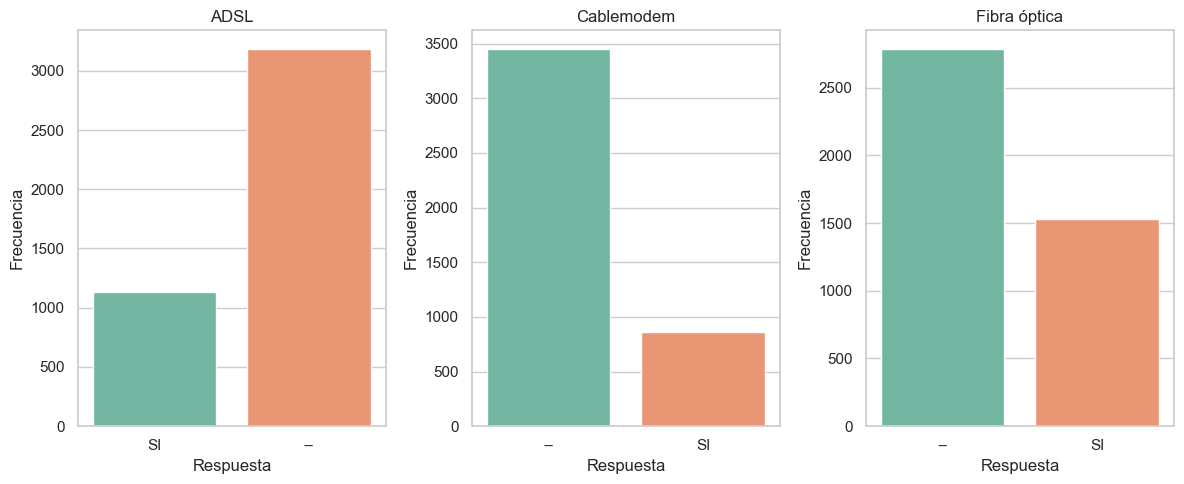

In [86]:
# Crear una figura con dos gráficos uno al lado del otro
plt.figure(figsize=(12, 5))

# Primer gráfico a la izquierda
plt.subplot(1, 3, 1)
sns.set(style="whitegrid")
sns.countplot(x=df_local["ADSL"], palette="Set2")
plt.xlabel("Respuesta")
plt.ylabel("Frecuencia")
plt.title("ADSL")

# Segundo gráfico a la derecha
plt.subplot(1, 3, 2)
sns.set(style="whitegrid")
sns.countplot(x=df_local["Cablemódem"], palette="Set2")
plt.xlabel("Respuesta")
plt.ylabel("Frecuencia")
plt.title("Cablemodem")

# Segundo gráfico a la derecha
plt.subplot(1, 3, 3)
sns.set(style="whitegrid")
sns.countplot(x=df_local["Fibra óptica"], palette="Set2")
plt.xlabel("Respuesta")
plt.ylabel("Frecuencia")
plt.title("Fibra óptica")
# Ajustar el espaciado entre los gráficos
plt.tight_layout()

# Mostrar la figura con los dos gráficos
plt.show()


Se observa que el servicio mas utilizado es ADSL

Voy a reemplazar todos los valores -- por NO

In [7]:
df_local.columns

Index(['Provincia', 'Partido', 'Localidad', 'ADSL', 'Cablemódem', 'Dial Up',
       'Fibra óptica', '4G', '3G', 'Telefonía Fija', 'Wireless', 'Satelital'],
      dtype='object')

In [93]:
# Utilizar el método replace para realizar el reemplazo
df_local[['ADSL', 'Cablemódem', 'Dial Up',
       'Fibra óptica', '4G', '3G', 'Telefonía Fija', 'Wireless', 'Satelital']] = df_local[['ADSL', 'Cablemódem', 'Dial Up',
       'Fibra óptica', '4G', '3G', 'Telefonía Fija', 'Wireless', 'Satelital']].replace("--", "NO")


In [96]:
df_local

,Provincia,Partido,Localidad,ADSL,Cablemódem,Dial Up,Fibra óptica,4G,3G,Telefonía Fija,Wireless,Satelital
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),SI,NO,NO,NO,SI,SI,SI,NO,NO
1,BUENOS AIRES,9 de Julio,Carlos María Naón,NO,NO,NO,NO,SI,SI,SI,NO,NO
2,BUENOS AIRES,9 de Julio,Dudignac,NO,NO,SI,NO,SI,SI,SI,SI,NO
3,BUENOS AIRES,9 de Julio,La Aurora (Est. La Niña),NO,NO,NO,NO,SI,NO,NO,NO,NO
4,BUENOS AIRES,9 de Julio,Manuel B. Gonnet (Est. French),SI,NO,NO,SI,SI,SI,SI,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
4306,BUENOS AIRES,Pilar,Pilar,SI,SI,SI,SI,SI,SI,SI,SI,SI
4307,BUENOS AIRES,Pilar,Presidente Derqui,SI,SI,NO,SI,SI,SI,SI,SI,NO
4308,BUENOS AIRES,Pilar,Roberto De Vicenzo,NO,NO,NO,NO,SI,SI,NO,NO,NO
4309,BUENOS AIRES,Pilar,Santa Teresa,NO,NO,NO,NO,SI,SI,NO,NO,SI


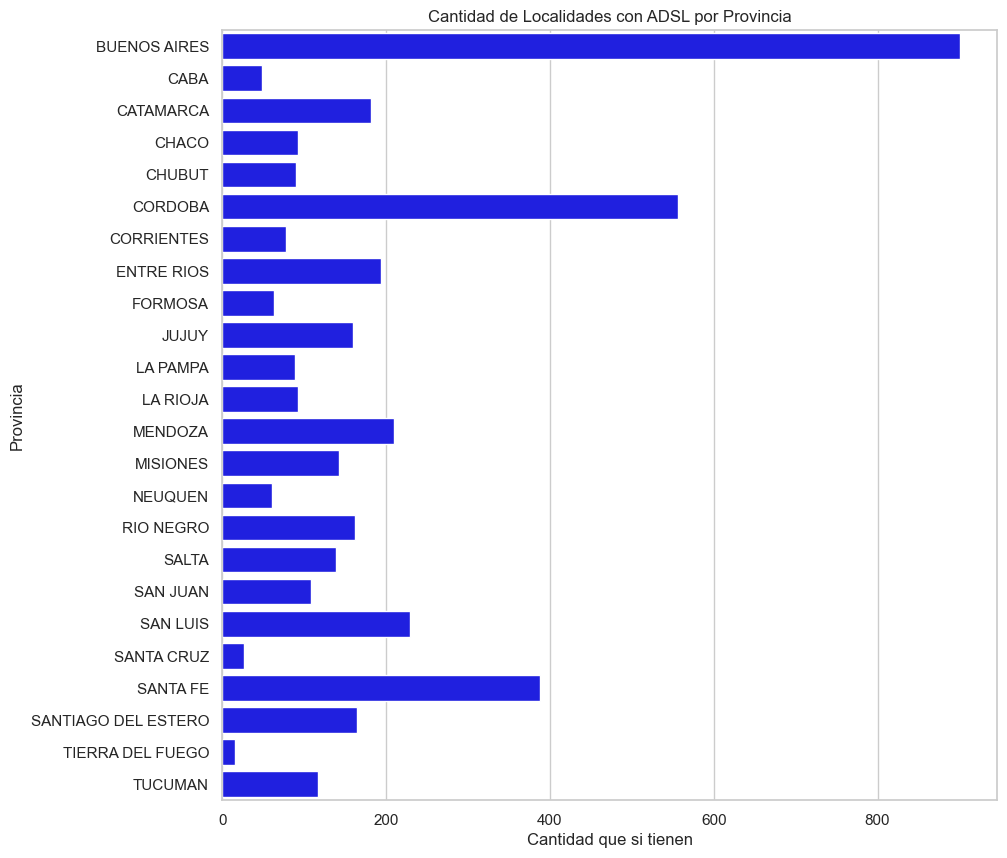

In [99]:
# Configurar el gráfico de barras con Seaborn
plt.figure(figsize=(10, 10))
# Calcular la suma de 'ADSL' por provincia
suma_adsl_por_provi = df_local.groupby('Provincia')['ADSL'].count().reset_index()


sns.barplot(x='ADSL', y='Provincia', data=suma_adsl_por_provi, color='blue', ci=None)
# Etiquetas y título
plt.xlabel('Cantidad que si tienen')
plt.ylabel('Provincia')
plt.title('Cantidad de Localidades con ADSL por Provincia')

# Mostrar el gráfico
plt.show()



Observo que la mayor cantidad de localidades conectadas son Buenos Aires Santa Fe y Cordoba
#Ahora Grabo en un csv para usarlo en en Dashboard, porque me interesan la localidades que no tienen internet

In [10]:
df_local.to_csv("data/16-Localcon_Internet.csv")

In [35]:
df01=pd.read_csv("data/01-Internet_Penetracion.csv")

In [36]:
df01

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,2022,4,Buenos Aires,"78,94",NaN,NaN,NaN
1,2022,4,Capital Federal,"122,73",NaN,NaN,NaN
2,2022,4,Catamarca,"65,77",NaN,NaN,NaN
3,2022,4,Chaco,"43,62",NaN,NaN,NaN
4,2022,4,Chubut,"85,57",NaN,NaN,NaN
...,...,...,...,...,...,...,...
859,2014,1,Santa Cruz,"28,94",NaN,NaN,NaN
860,2014,1,Santa Fe,"47,85",NaN,NaN,NaN
861,2014,1,Santiago Del Estero,"16,31",NaN,NaN,NaN
862,2014,1,Tierra Del Fuego,"63,97",NaN,NaN,NaN


In [37]:
# se borran columnas innecesarias
df01=df01.drop(["Unnamed: 4","Unnamed: 5","Unnamed: 6"],axis=1)

In [45]:
df01.info()

<class 'pandas.core.frame.DataFrame'>
Index: 864 entries, 0 to 863
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Año                           864 non-null    int64         
 1   Trimestre                     864 non-null    int64         
 2   Provincia                     864 non-null    object        
 3   Accesos por cada 100 hogares  864 non-null    object        
 4   Fecha                         864 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 40.5+ KB


Voy a colocarle fecha a y ordenar por fecha, para los KPI necesito las fechas

In [71]:
df01['Fecha'] = pd.to_datetime(
    df01['Año'].astype(str) +
    (df01['Trimestre'] * 3).astype(str).str.pad(2, fillchar='0') +
    '01',
    format='%Y%m%d'
)


In [75]:
df01=df01.sort_values(by="Fecha", ascending=False)

In [46]:
df01['Fecha'] = pd.to_datetime(df01['Fecha'], format='%Y-%m-%d')


In [79]:
df01

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Fecha
0,2022,4,Buenos Aires,"78,94",2022-12-01
1,2022,4,Santiago Del Estero,"48,05",2022-12-01
2,2022,4,Córdoba,"89,03",2022-12-01
3,2022,4,Neuquén,"78,67",2022-12-01
4,2022,4,Tucumán,"61,04",2022-12-01
...,...,...,...,...,...
859,2014,1,Capital Federal,"112,25",2014-03-01
860,2014,1,Buenos Aires,"54,57",2014-03-01
861,2014,1,La Rioja,"16,29",2014-03-01
862,2014,1,San Juan,"27,60",2014-03-01


Grabo en un csv para trabajarlo en Power Bi

In [78]:
df01.to_csv("data/Accesos_100Hogares.csv")

In [22]:
Accesos_porTec=pd.read_csv("data/02-Internet_Penetracion.csv")

In [23]:
Accesos_porTec

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,4,"77,21","24,15",Oct-Dic 2022
1,2022,3,"76,64","23,95",Jul-Sept 2022
2,2022,2,"75,97","23,72",Abr-Jun 2022
3,2022,1,"73,88","23,05",Ene-Mar 2022
4,2021,4,"73,18","22,81",Oct-Dic 2021
5,2021,3,"70,58","21,98",Jul-Sept 2021
6,2021,2,"69,24","21,55",Abr-Jun 2021
7,2021,1,"67,95","21,13",Ene-Mar 2021
8,2020,4,"67,62","21,01",Oct-Dic 2020
9,2020,3,"66,31","20,59",Jul-Sept 2020


Accesos por cada 100 hogares = (numero total de accesos a internet/numero total de hogares)* 100
Seria  un porcentaje por hogar  de accesos por año-trimestre

Accesos por cada 100 habitantes=( Numero total de accesos al servicio / Poblacion total)×100

In [25]:
Penetracion.head(2)

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,4,"77,21","24,15",Oct-Dic 2022
1,2022,3,"76,64","23,95",Jul-Sept 2022


Voy a ver como varian por año las 2 variables principales

In [26]:
Penetracion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           36 non-null     int64 
 1   Trimestre                     36 non-null     int64 
 2   Accesos por cada 100 hogares  36 non-null     object
 3   Accesos por cada 100 hab      36 non-null     object
 4   Periodo                       36 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.5+ KB


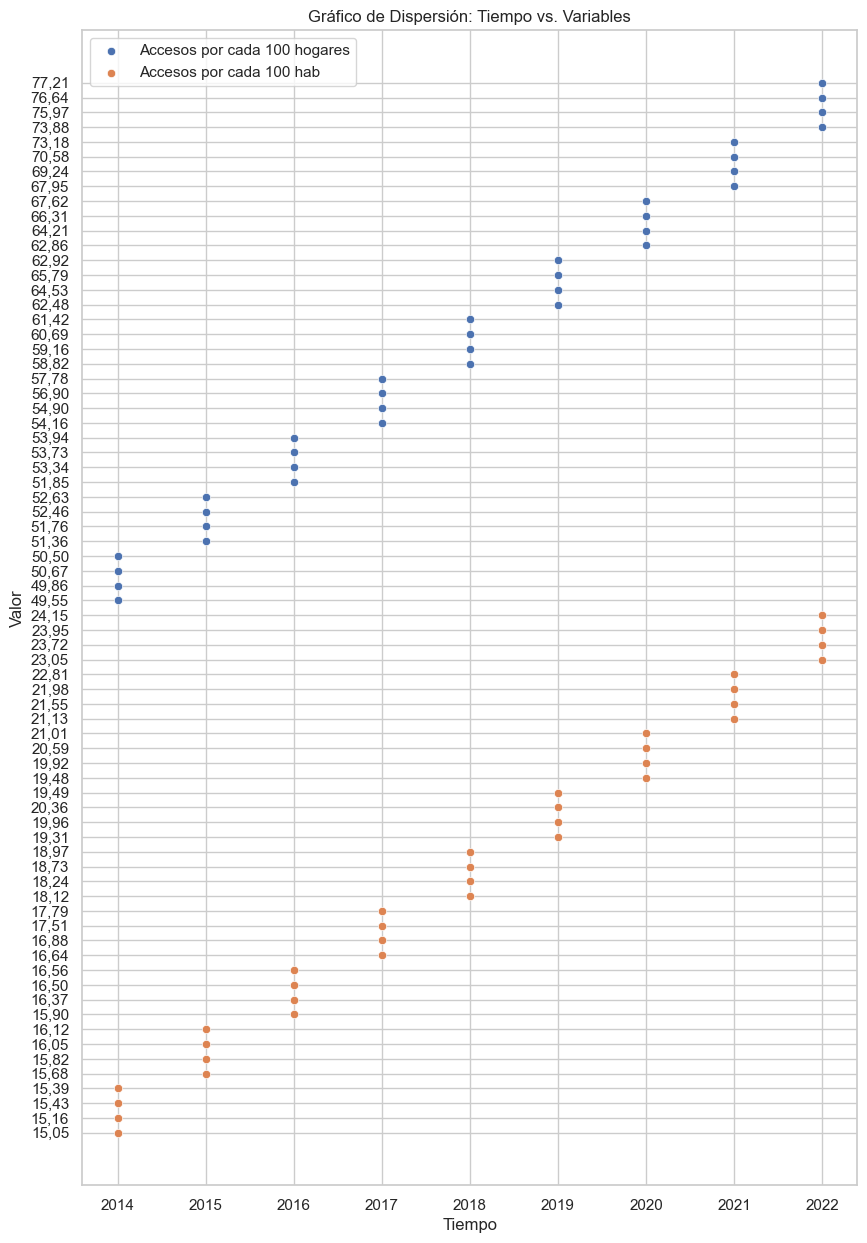

In [27]:

# Configurar el estilo de Seaborn (opcional)
sns.set(style="whitegrid")

# Crear un gráfico de dispersión con dos variables a lo largo del tiempo
plt.figure(figsize=(10, 15))
sns.scatterplot(x=Penetracion['Año'], y=Penetracion['Accesos por cada 100 hogares'], data=Penetracion, label='Accesos por cada 100 hogares')
sns.scatterplot(x=Penetracion['Año'], y=Penetracion['Accesos por cada 100 hab'], data=Penetracion, label='Accesos por cada 100 hab')

# Configurar leyenda y etiquetas
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Gráfico de Dispersión: Tiempo vs. Variables')

# Mostrar el gráfico
plt.show()


Se observa el incremento de los accesos a internet en forma lineal año a año . Igualmente relativo a hogar que por conexion

In [38]:
BAF=pd.read_csv("data/03-Internet_BAF.csv")

In [39]:
BAF

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2022,4,11,12,11,Oct-Dic 2022
1,2022,3,11,12,11,Jul-Sept 2022
2,2022,2,11,12,11,Abr-Jun 2022
3,2022,1,11,13,11,Ene-Mar 2022
4,2021,4,10,13,10,Oct-Dic 2021
5,2021,3,10,10,10,Jul-Sept 2021
6,2021,2,10,10,10,Abr-Jun 2021
7,2021,1,10,10,10,Ene-Mar 2021
8,2020,4,10,10,10,Oct-Dic 2020
9,2020,3,9,10,9,Jul-Sept 2020


No se entiende la información de esta tabla por el valor de Bancha ancha fija y dial up. Si resultara necesario para mi proyecto volvere sobre ello. En apariencia no la tomare para mis análisis.

In [40]:
BAF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               36 non-null     int64 
 1   Trimestre         36 non-null     int64 
 2   Banda ancha fija  36 non-null     int64 
 3   Dial up           36 non-null     int64 
 4   Total             36 non-null     int64 
 5   Periodo           36 non-null     object
dtypes: int64(5), object(1)
memory usage: 1.8+ KB


In [41]:
BAF2=pd.read_csv("data/04-Internet_BAF.csv")

In [42]:
BAF2

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,4,Buenos Aires,5,6.0,5
1,2022,4,Capital Federal,2,2.0,2
2,2022,4,Catamarca,71,1.0,71
3,2022,4,Chaco,144,5.0,144
4,2022,4,Chubut,168,904.0,169
...,...,...,...,...,...,...
859,2014,1,Santa Cruz,26,460.0,27
860,2014,1,Santa Fe,506,612.0,507
861,2014,1,Santiago Del Estero,37,9.0,37
862,2014,1,Tierra Del Fuego,27,766.0,28


Entre las dos ultimas tablas trabajare en BAF2 poruq aporta mas informacion esta discriminada por provincia

In [107]:
df05=pd.read_csv("data/05-Internet_Accesos-por-tecnologia.csv")

In [108]:
df05

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,4,1,6,3,573,222,11,Oct-Dic 2022
1,2022,3,1,6,3,557,235,11,Jul-Sept 2022
2,2022,2,1,6,3,556,232,11,Abr-Jun 2022
3,2022,1,2,6,2,546,252,11,Ene-Mar 2022
4,2021,4,2,6,2,523,253,10,Oct-Dic 2021
5,2021,3,2,6,2,492,250,10,Jul-Sept 2021
6,2021,2,2,6,1,477,254,10,Abr-Jun 2021
7,2021,1,2,5,1,435,250,10,Ene-Mar 2021
8,2020,4,2,5,1,422,253,10,Oct-Dic 2020
9,2020,3,2,5,1,413,249,9,Jul-Sept 2020


In [34]:
df06=pd.read_csv("data/06-Internet_Accesos-por-tecnologia.csv")

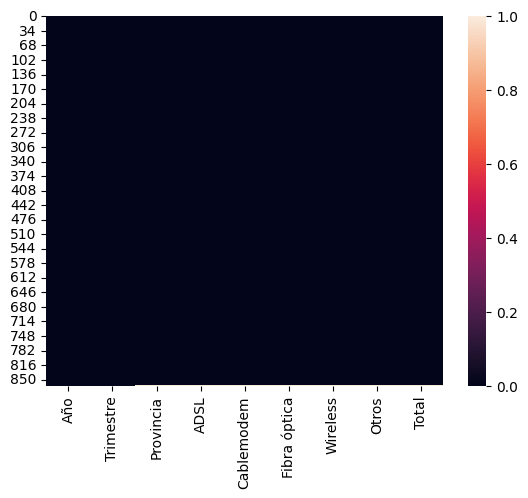

In [21]:
sns.heatmap(df06.isnull())
plt.show()

In [36]:
df06[df06["Provincia"]=="Tucumán"]

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
23,2022,4,Tucumán,69.0,21.0,169.0,4.0,527.0,263.0
47,2022,3,Tucumán,78.0,19.0,162.0,4.0,519.0,263.0
71,2022,2,Tucumán,86.0,15.0,149.0,4.0,487.0,255.0
95,2022,1,Tucumán,93.0,62.0,86.0,4.0,487.0,246.0
119,2021,4,Tucumán,98.0,59.0,79.0,3.0,486.0,239.0
143,2021,3,Tucumán,104.0,54.0,71.0,2.0,743.0,232.0
167,2021,2,Tucumán,110.0,48.0,72.0,2.0,743.0,233.0
191,2021,1,Tucumán,147.0,12.0,70.0,2.0,740.0,232.0
215,2020,4,Tucumán,149.0,11.0,68.0,2.0,740.0,231.0
239,2020,3,Tucumán,150.0,12.0,60.0,2.0,762.0,224.0


Me quedo con la tabla 06 que aporta informacon de provincia

Tengo que sacarle los asteriscos

In [39]:

df06['Año'] = df06['Año'].str.replace('*', '').str.strip()
# saco los *
df06['Trimestre'] = df06['Trimestre'].str.replace('*', '').str.strip()


Voy observando provincia x provincia porque aparecen los numeros distorsionados, y tengo q corregir una por una

In [42]:
df06[df06["Provincia"]=="Chubut"]

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
4,2022,4,Chubut,45.0,74.0,10.0,31.0,900.0,169.0
28,2022,3,Chubut,45.0,72.0,10.0,30.0,900.0,166.0
52,2022,2,Chubut,45.0,69.0,10.0,30.0,900.0,163.0
76,2022,1,Chubut,44.0,67.0,900.0,31.0,21.0,172.0
100,2021,4,Chubut,46.0,57.0,10.0,28.0,19.0,160.0
124,2021,3,Chubut,49.0,56.0,900.0,23.0,19.0,156.0
148,2021,2,Chubut,49.0,41.0,600.0,24.0,19.0,139.0
172,2021,1,Chubut,46.0,41.0,300.0,24.0,19.0,132.0
196,2020,4,Chubut,46.0,40.0,300.0,23.0,19.0,131.0
220,2020,3,Chubut,46.0,39.0,300.0,23.0,19.0,130.0


Se observa una distorsion en los numeros de accesos pasando de 886 a 1, por lo cual tiene sentido multiplicar por mil los valores menores a 10 ya que se observa una diferencia significativa, muy probable por la carga del tipo de dato

In [41]:
# Multiplicar las columnas por mil si su valor es menor a 10
# Lista de columnas a multiplicar
columnas_a_multiplicar = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Otros']

# Multiplicar las columnas por mil si su valor es = 1
df06[columnas_a_multiplicar] = df06[columnas_a_multiplicar].applymap(lambda x: x * 1000 if x == 1 else x)

# Multiplicar las columnas por cien si su valor es entre 1 y 100
df06[columnas_a_multiplicar] = df06[columnas_a_multiplicar].applymap(lambda x: x * 100 if x >1 and x< 10 else x)


In [33]:
df06

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,4,Buenos Aires,326.0,300.0,1000.0,130.0,7200.0,5.0
1,2022,4,Capital Federal,139.0,1000.0,139.0,500.0,3200.0,2.0
2,2022,4,Catamarca,900.0,1100.0,4700.0,1000.0,200.0,71.0
3,2022,4,Chaco,2500.0,6100.0,4700.0,800.0,300.0,144.0
4,2022,4,Chubut,4500.0,7400.0,1000.0,3100.0,900.0,169.0
...,...,...,...,...,...,...,...,...,...
860,2014,1,Santa Fe,323.0,174.0,300.0,600.0,644.0,507.0
861,2014,1,Santiago Del Estero,3300.0,400.0,1900.0,915.0,3400.0,37.0
862,2014,1,Tierra Del Fuego,2200.0,300.0,648.0,1000.0,300.0,28.0
863,2014,1,Tucumán,130.0,8300.0,121.0,1300.0,9800.0,130.0


Grafico para ver si todo coincide con la realidad la suma de los accesos por provincia

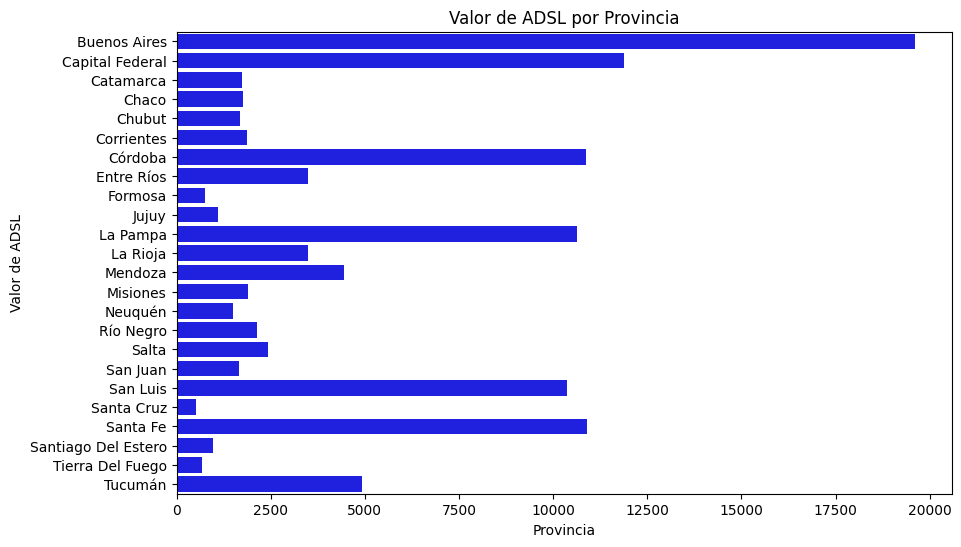

In [43]:
# Configurar el gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
# Calcular la suma de 'ADSL' por provincia
suma_adsl_por_provincia = df06.groupby('Provincia')['ADSL'].sum().reset_index()


sns.barplot(x='ADSL', y='Provincia', data=suma_adsl_por_provincia, color='blue', ci=None)
# Etiquetas y título
plt.xlabel('Provincia')
plt.ylabel('Valor de ADSL')
plt.title('Valor de ADSL por Provincia')

# Mostrar el gráfico
plt.show()


Se evidencia mucho mayor conectividad en las provincias mas productivas del pais

Voy a colocarle fecha a y ordenar por fecha, para los KPI necesito las fechas

In [118]:
df06.info()

<class 'pandas.core.frame.DataFrame'>
Index: 864 entries, 0 to 863
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    864 non-null    int64         
 1   Año           864 non-null    int32         
 2   Trimestre     864 non-null    int32         
 3   Provincia     864 non-null    object        
 4   ADSL          864 non-null    float64       
 5   Cablemodem    864 non-null    float64       
 6   Fibra óptica  864 non-null    float64       
 7   Wireless      864 non-null    float64       
 8   Otros         864 non-null    float64       
 9   Total         864 non-null    float64       
 10  Fecha         864 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int32(2), int64(1), object(1)
memory usage: 74.2+ KB


In [44]:
# borro nulos
df06.dropna(inplace=True)

In [45]:
# Convertir las columnas 'Año' y 'Trimestre' a enteros
df06['Año'] = df06['Año'].astype(int)
df06['Trimestre'] = df06['Trimestre'].astype(int)


In [47]:
df06['Fecha'] = pd.to_datetime(
    df06['Año'].astype(str) +
    (df06['Trimestre'] * 3).astype(str).str.pad(2, fillchar='0') +
    '01',
    format='%Y%m%d'
)

In [54]:
df06.describe()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Fecha
count,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864
mean,2018.000000,2.500000,128.748843,253.625000,304.891204,57.777778,320.421296,1065.464120,2018-07-16 20:40:00
min,2014.000000,1.000000,10.000000,0.000000,0.000000,0.000000,10.000000,56.000000,2014-03-01 00:00:00
25%,2016.000000,1.750000,25.000000,35.000000,24.000000,4.000000,34.000000,640.000000,2016-05-09 00:00:00
50%,2018.000000,2.500000,50.000000,71.000000,156.500000,10.000000,200.000000,1012.500000,2018-07-17 00:00:00
75%,2020.000000,3.250000,141.500000,400.000000,500.000000,26.000000,501.750000,1412.000000,2020-09-23 18:00:00
max,2022.000000,4.000000,1000.000000,1000.000000,1000.000000,952.000000,1000.000000,3012.000000,2022-12-01 00:00:00
std,2.583484,1.118682,199.156397,308.048574,330.700583,156.015038,325.384395,582.281475,NaN


Corrijo columna Total que esta mal en algunas filas (no es la sumatoria)

In [49]:
df06["Total"]=df06["Cablemodem"]+df06["ADSL"]+df06["Fibra óptica"]+df06["Wireless"]+df06["Otros"]

In [50]:
df06.sort_values(by='Fecha',inplace=True)

In [51]:
df06

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Fecha
863,2014,1,Tucumán,130.0,83.0,121.0,13.0,98.0,445.0,2014-03-01
840,2014,1,Buenos Aires,200.0,1000.0,121.0,17.0,34.0,1372.0,2014-03-01
841,2014,1,Capital Federal,446.0,820.0,18.0,2.0,15.0,1301.0,2014-03-01
842,2014,1,Catamarca,24.0,46.0,17.0,0.0,43.0,130.0,2014-03-01
843,2014,1,Chaco,53.0,900.0,30.0,0.0,58.0,1041.0,2014-03-01
...,...,...,...,...,...,...,...,...,...,...
21,2022,4,Santiago Del Estero,14.0,81.0,15.0,7.0,300.0,417.0,2022-12-01
22,2022,4,Tierra Del Fuego,13.0,41.0,405.0,157.0,651.0,1267.0,2022-12-01
23,2022,4,Tucumán,69.0,21.0,169.0,4.0,527.0,790.0,2022-12-01
12,2022,4,Mendoza,38.0,78.0,147.0,28.0,200.0,491.0,2022-12-01


Grabo el df06 como csv

In [52]:
df06.to_csv("data/06-Penet_por_Tecnologia.csv",index=False)

Comienzo el analisis de otro CSV historico_velocidad_internet.csv

In [59]:
df09=pd.read_csv("data/09-historico_velocidad_internet.csv")

In [62]:
df09.sort_values(by='Mbps (Media de bajada)', ascending=False)

,Año,Trimestre,Provincia,Mbps (Media de bajada)
463,2018,1,Entre Ríos,988.000
202,2020,4,La Pampa,988.000
368,2019,1,Formosa,983.000
392,2018,4,Formosa,982.000
309,2019,4,Santiago Del Estero,979.000
...,...,...,...,...
439,2018,2,Entre Ríos,1.019
228,2020,3,Mendoza,1.019
488,2017,4,Formosa,1.011
423,2018,3,Río Negro,1.006


In [63]:
df09.describe()

,Año,Trimestre,Mbps (Media de bajada)
count,864.000000,864.000000,864.000000
mean,2018.000000,2.500000,302.410067
std,2.583484,1.118682,287.314571
min,2014.000000,1.000000,1.000000
25%,2016.000000,1.750000,2.808500
50%,2018.000000,2.500000,344.000000
75%,2020.000000,3.250000,520.250000
max,2022.000000,4.000000,988.000000


Genera dudas los valores de bajada, investigo para capital y buenos aires - es un flotante con 3 decimales que varia de 1 a 988

In [67]:
df09[df09["Provincia"]=="Buenos Aires"]

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,4,Buenos Aires,111.000
24,2022,3,Buenos Aires,7.019
48,2022,2,Buenos Aires,655.000
72,2022,1,Buenos Aires,6.251
96,2021,4,Buenos Aires,6.021
120,2021,3,Buenos Aires,5.626
144,2021,2,Buenos Aires,5.276
168,2021,1,Buenos Aires,5.079
192,2020,4,Buenos Aires,5.001
216,2020,3,Buenos Aires,4.838


Genera dudas los saltos de valores antes del 3er trimestre del 2017 estan cargados los datos con punto decimal. De todos modos , no es de mi interes en este momento para el análisis que voy a hacer

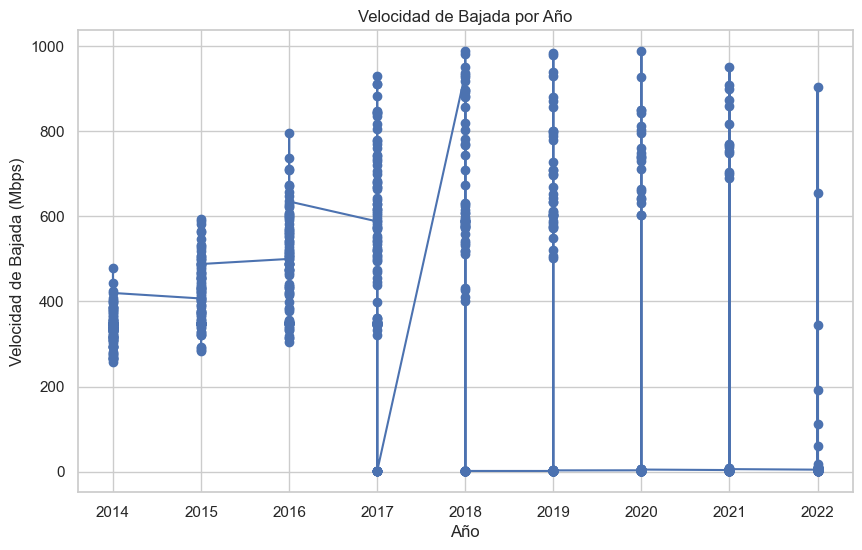

In [68]:

# Configurar el gráfico
plt.figure(figsize=(10, 6))
plt.plot(df09['Año'], df09['Mbps (Media de bajada)'], marker='o', linestyle='-', color='b')

# Etiquetas y título
plt.xlabel('Año')
plt.ylabel('Velocidad de Bajada (Mbps)')
plt.title('Velocidad de Bajada por Año')

# Mostrar el gráfico
plt.show()


Se observan los saltos en la mediciones

In [36]:
df11=pd.read_csv("data/11-Internet_Accesos-por-velocidad.csv")

In [112]:
a=df11[df11["Total"]=='1.049.660']

In [113]:
a

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
5,2022,4,Córdoba,99.0,9.929,143.686,108.195,63.12,20.691,686.330,17.61,1.049.660


In [116]:
df11.head(5)

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
2,2022,4,Catamarca,71.0,315.000,2.716,5.028,4.638,3.122,52.739,2.280,70.909
7,2022,4,Entre Ríos,107.0,4.722,45.629,46.700,20.927,22.483,130.406,0.000,270.974
21,2022,4,Santiago Del Estero,178.0,1.267,26.183,58.136,17.735,661.000,14.345,989.000,119.494
16,2022,4,Salta,114.0,1.197,31.530,71.105,5.036,117.000,90.014,6.747,205.860
5,2022,4,Córdoba,99.0,9.929,143.686,108.195,63.120,20.691,686.330,17.610,1.049.660


In [118]:
df11["Total"] = df11["Total"].str.replace(',', '')
# Convierto la columna total tipo de dato float
df11["Total"] = df11["Total"].astype(int)

In [87]:
df11=df11.sort_values(by = ["Año","Trimestre"], ascending=False)
df11[(df11["Provincia"]=="Formosa") ]

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
8,2022,4,Formosa,84.000,245.000,22.458,12.391,6.724,310.000,18.930,698.000,61.840
32,2022,3,Formosa,97.000,307.000,23.538,19.545,6.194,564.000,17.704,589.000,68.538
56,2022,2,Formosa,97.000,407.000,23.834,19.706,6.330,591.000,16.326,590.000,67.881
80,2022,1,Formosa,97.000,448.000,24.113,6.945,6.613,716.000,15.028,588.000,54.548
104,2021,4,Formosa,84.000,0.000,22.908,6.983,6.811,1.135,13.775,1.967,53.663
128,2021,3,Formosa,381.000,0.000,22.778,7.142,6.978,1.192,12.707,1.617,52.795
152,2021,2,Formosa,381.000,0.000,22.364,7.310,7.460,1.341,11.077,1.618,51.551
176,2021,1,Formosa,56.000,0.000,22.409,7.569,7.916,1.215,9.579,1.942,50.686
200,2020,4,Formosa,56.000,0.000,23.540,7.606,7.181,1.197,8.946,1.680,50.206
224,2020,3,Formosa,391.000,151.000,23.163,7.432,7.125,991.000,8.219,1.737,49.209


La expresión "accesos a Internet por año para una provincia" se refiere a la cantidad o el número de conexiones a Internet registradas en una provincia específica durante un año determinado. Es una métrica que se utiliza para medir la penetración de Internet en una determinada área geográfica y en un período de tiempo específico.

In [88]:
df11[(df11["Provincia"]=="Buenos Aires") ]

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,4,Buenos Aires,28.934,23.347,259.866,281.550,244.555,98.670,3.760.109,97.634,4.794.665
24,2022,3,Buenos Aires,29.985,27.709,290.315,297.915,267.044,124.190,3.618.689,65.821,4.721.668
48,2022,2,Buenos Aires,30.639,28.323,295.238,307.554,273.954,129.869,3.535.757,65.849,4.667.183
72,2022,1,Buenos Aires,31.591,30.056,313.382,321.756,290.127,161.183,3.381.049,26.280,4.555.424
96,2021,4,Buenos Aires,37.821,11.026,352.950,331.292,297.296,196.021,3.259.793,22.958,4.509.157
120,2021,3,Buenos Aires,37.193,31.149,1.108.940,248.153,141.383,192.797,2.482.266,9.728,4.251.609
144,2021,2,Buenos Aires,37.192,31.178,1.096.049,244.001,140.322,236.897,2.337.604,9.108,4.132.351
168,2021,1,Buenos Aires,36.939,31.187,1.108.368,240.520,163.747,222.061,2.246.313,10.867,4.060.002
192,2020,4,Buenos Aires,36.939,31.197,1.109.865,242.243,214.171,213.588,2.176.242,9.016,4.033.261
216,2020,3,Buenos Aires,37.542,31.514,1.113.823,234.710,219.772,194.248,2.085.815,19.853,3.937.277


In [74]:
df11.describe()

,Año,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,OTROS
count,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,858.000000
mean,2018.000000,2.500000,126.069829,104.202722,70.717505,78.652155,99.993059,34.439517
std,2.583484,1.118682,186.417712,211.789353,138.831868,168.570068,207.349280,133.288022
min,2014.000000,1.000000,1.007000,0.000000,0.000000,0.000000,0.000000,-1.945000
25%,2016.000000,1.750000,11.000000,3.310750,5.410250,5.000000,2.091000,0.000000
50%,2018.000000,2.500000,51.000000,8.762000,20.208000,15.159000,11.042500,0.000000
75%,2020.000000,3.250000,133.250000,85.525500,61.934500,51.959500,64.286250,7.939750
max,2022.000000,4.000000,998.000000,999.000000,917.000000,978.000000,997.000000,989.000000


In [75]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
Index: 864 entries, 863 to 432
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  864 non-null    int64  
 1   Trimestre            864 non-null    int64  
 2   Provincia            864 non-null    object 
 3   HASTA 512 kbps       864 non-null    float64
 4   + 512 Kbps - 1 Mbps  864 non-null    float64
 5   + 1 Mbps - 6 Mbps    864 non-null    object 
 6   + 6 Mbps - 10 Mbps   864 non-null    float64
 7   + 10 Mbps - 20 Mbps  864 non-null    float64
 8   + 20 Mbps - 30 Mbps  864 non-null    float64
 9   + 30 Mbps            864 non-null    object 
 10  OTROS                858 non-null    float64
 11  Total                864 non-null    object 
dtypes: float64(6), int64(2), object(4)
memory usage: 87.8+ KB


Observo las conecciones de acuerdo a la velocidad, tomo la mas comun de 20 mg

C:\Users\Musi\AppData\Local\Temp\ipykernel_6348\1391698385.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df11['+ 20 Mbps - 30 Mbps'],y=df11['Provincia'], data=df11, color='blue', ci=None)


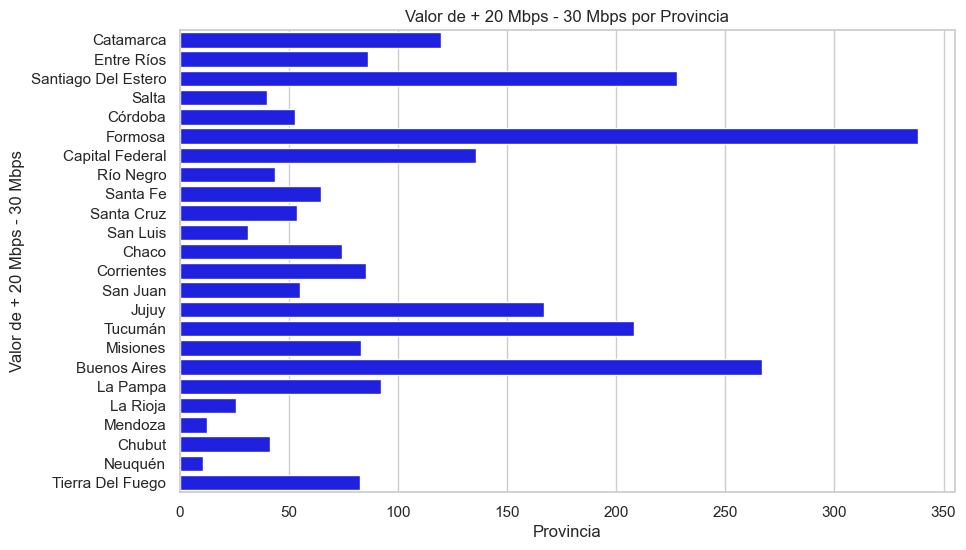

In [106]:
# Configurar el gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=df11['+ 20 Mbps - 30 Mbps'],y=df11['Provincia'], data=df11, color='blue', ci=None)

# Etiquetas y título
plt.xlabel('Provincia')
plt.ylabel('Valor de + 20 Mbps - 30 Mbps')
plt.title('Valor de + 20 Mbps - 30 Mbps por Provincia')

# Mostrar el gráfico
plt.show()


Voy a considerar los datos a partir del año 2018. Me resulta raro lo de Formosa

In [92]:
df11_18=df11[df11["Año"]>2017]

vuelvo a graficar

C:\Users\Musi\AppData\Local\Temp\ipykernel_6348\3266911501.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df11_18['+ 20 Mbps - 30 Mbps'],y=df11_18['Provincia'], data=df06, color='red', ci=None)


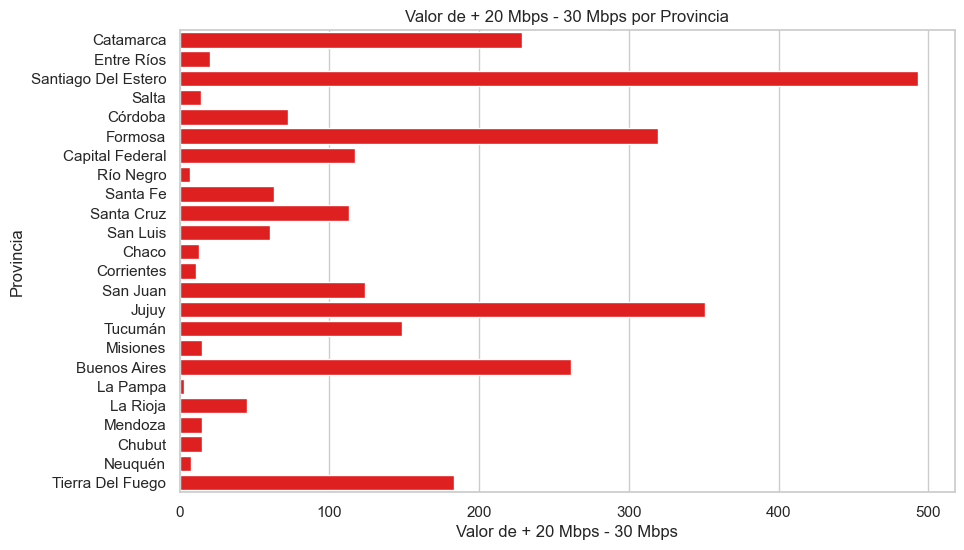

In [91]:
# Configurar el gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=df11_18['+ 20 Mbps - 30 Mbps'],y=df11_18['Provincia'], data=df06, color='red', ci=None)

# Etiquetas y título
plt.xlabel('Valor de + 20 Mbps - 30 Mbps')
plt.ylabel('Provincia')
plt.title('Valor de + 20 Mbps - 30 Mbps por Provincia')

# Mostrar el gráfico
plt.show()


In [76]:
df10=pd.read_csv("data/10-Internet_Accesos-por-velocidad.csv")

In [79]:
df10.describe()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,OTROS
count,36.000000,36.000000,36.000000,36.000000,36.000000
mean,2018.000000,2.500000,49.571639,239.046083,126.059500
std,2.618615,1.133893,52.406959,198.205545,120.429286
min,2014.000000,1.000000,5.675000,28.521000,0.000000
25%,2016.000000,1.750000,28.412500,74.491750,0.000000
50%,2018.000000,2.500000,38.879500,216.701500,155.810000
75%,2020.000000,3.250000,41.184000,389.368250,199.011250
max,2022.000000,4.000000,241.713000,687.619000,394.282000


In [96]:
df11_18.describe()

,Año,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,OTROS
count,480.000000,480.0000,480.000000,480.000000,480.000000,480.000000,480.000000,474.000000
mean,2020.000000,2.5000,117.482594,147.319935,67.477577,68.920419,112.138002,62.012576
std,1.415689,1.1192,141.513169,256.534046,132.451147,146.640445,213.497838,174.522504
min,2018.000000,1.0000,1.009000,0.000000,1.311000,0.000000,0.000000,-1.945000
25%,2019.000000,1.7500,32.000000,1.977500,7.184750,7.169500,5.249250,2.207250
50%,2020.000000,2.5000,67.000000,7.217500,21.367500,20.035000,16.418000,6.776500
75%,2021.000000,3.2500,125.000000,175.000000,58.593500,40.879000,74.730000,18.944250
max,2022.000000,4.0000,991.000000,999.000000,917.000000,978.000000,991.000000,989.000000


El mismo grafico pero para mayor el Total

C:\Users\Musi\AppData\Local\Temp\ipykernel_6348\3357878725.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df11['Total'],y=df11['Provincia'], data=df11, color='green', ci=None)


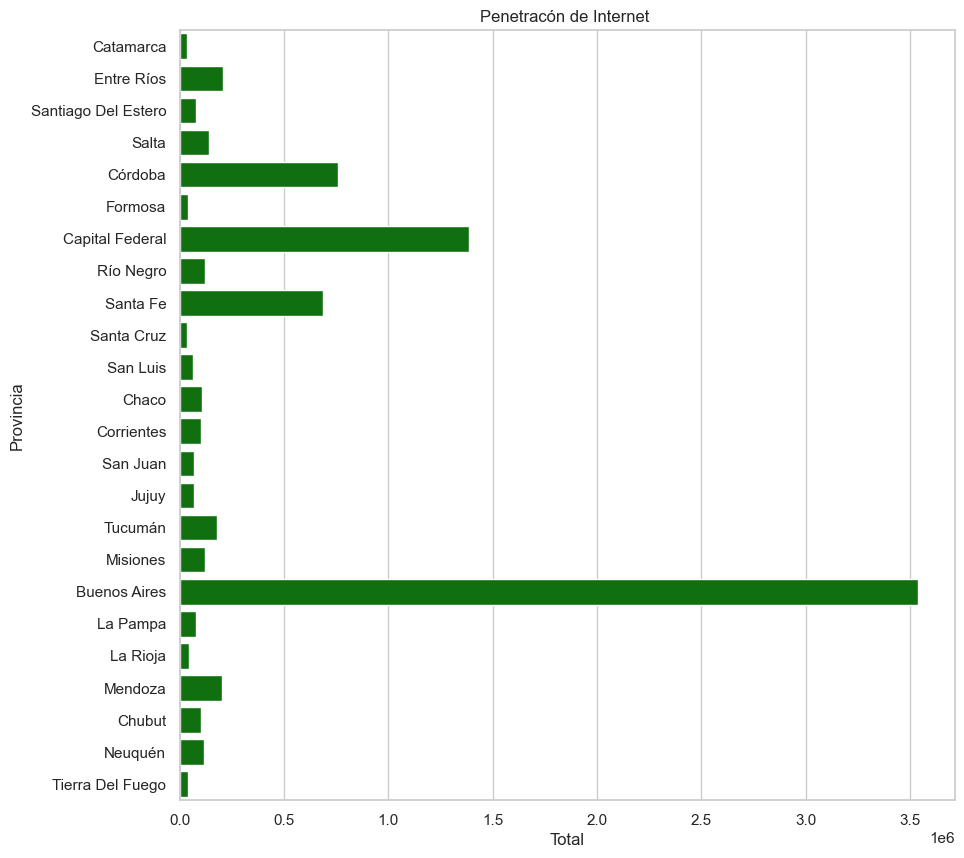

In [121]:
# Configurar el gráfico de barras con Seaborn
plt.figure(figsize=(10, 10))
sns.barplot(x=df11['Total'],y=df11['Provincia'], data=df11, color='green', ci=None)

# Etiquetas y título
plt.xlabel('Total')
plt.ylabel('Provincia')
plt.title('Penetracón de Internet ')

# Mostrar el gráfico
plt.show()


In [97]:
nulos_por_columna = df11.isnull().sum()

In [101]:
total_ceros = df11[(df11 == 0).any(axis=1)]
total_ceros

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
7,2022,4,Entre Ríos,107.000,4.722,45.629,46.700,20.927,22.483,130.406,0.0,270.974
9,2022,4,Jujuy,58.000,1.763,18.652,14.070,36.430,335.000,46.910,0.0,118.218
11,2022,4,La Rioja,18.000,595.000,2.531,3.010,24.435,5.029,50.644,0.0,86.262
33,2022,3,Jujuy,58.000,1.879,19.135,15.254,36.083,519.000,45.895,0.0,118.823
35,2022,3,La Rioja,18.000,689.000,2.842,3.375,24.219,5.331,50.390,0.0,86.864
...,...,...,...,...,...,...,...,...,...,...,...,...
845,2014,1,Córdoba,2.076,107.705,423.114,24.112,9.818,40.000,588,0.0,567.453
857,2014,1,San Juan,531.000,2.000,51.056,0.000,0.000,0.000,0,0.0,51.589
858,2014,1,San Luis,7.000,3.000,12.544,0.000,1.000,0.000,2,0.0,12.557
846,2014,1,Corrientes,20.000,16.357,40.742,4.486,630.000,0.000,0,0.0,62.235


In [59]:
df12=pd.read_csv("data/12-AccesosaInternetfijoporvelocidadbajadayprovincia_2791741699377708425.csv")

In [149]:
df12

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,63 Mbps,64 Mbps,65 Mbps,66 Mbps,67 Mbps,68 Mbps,70 Mbps,71 Mbps,75 Mbps,77 Mbps
0,2022.0,4.0,Buenos Aires,97634,18,0,0,28.724,192,4611,...,0,0,14,0,0,0,5655,0,90796,0
1,2022.0,4.0,Capital Federal,106772,31,0,0,451.000,34,1307,...,0,0,0,1,0,0,15,0,28406,0
2,2022.0,4.0,Catamarca,2280,0,0,0,34.000,37,0,...,0,0,0,0,0,0,0,0,0,0
3,2022.0,4.0,Chaco,3909,0,225,111,234.000,2,0,...,0,0,0,0,0,0,0,0,0,0
4,2022.0,4.0,Chubut,20026,8,0,0,69.000,32,836,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,2017.0,4.0,Santa Cruz,0,0,0,0,68.000,0,0,...,0,0,0,0,0,0,0,0,0,0
500,2017.0,4.0,Santa Fe,14119,0,0,0,3.109,0,7637,...,0,0,0,0,0,0,0,0,0,0
501,2017.0,4.0,Santiago Del Estero,0,0,0,0,41.000,0,909,...,0,0,0,0,0,0,0,0,0,0
502,2017.0,4.0,Tierra Del Fuego,0,0,0,0,6.000,0,282,...,0,0,0,0,0,0,0,0,0,0


In [147]:
df12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 97 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Año         504 non-null    float64
 1   Trimestre   504 non-null    float64
 2   Provincia   504 non-null    object 
 3   Otros       504 non-null    object 
 4   0,256 Mbps  504 non-null    object 
 5   0,375 Mbps  504 non-null    object 
 6   0,625 Mbps  504 non-null    object 
 7   0,5 Mbps    504 non-null    float64
 8   0,512 Mbps  504 non-null    object 
 9   0,75 Mbps   504 non-null    object 
 10  1 Mbps      504 non-null    object 
 11  1,2 Mbps    504 non-null    object 
 12  1,25 Mbps   504 non-null    object 
 13  1,5 Mbps    504 non-null    object 
 14  2 Mbps      504 non-null    object 
 15  2,2 Mbps    504 non-null    object 
 16  2,5 Mbps    504 non-null    object 
 17  6,7 Mbps    504 non-null    object 
 18  3 Mbps      504 non-null    float64
 19  3,2 Mbps    504 non-null    o

Se observa q los campos numericos son objet, voy a hacer las conversiones correspondientes

In [128]:
# Contar cuántas filas tienen el carácter '-0'
df12[df12['63 Mbps'].astype(str).str.contains('- 0')].shape[0]


475

In [143]:
df12.drop(504, inplace=True)
# la borro xq son todos nan

In [131]:
df12.columns

Index(['Año', 'Trimestre', 'Provincia', 'Otros', '0,256 Mbps', '0,375 Mbps',
       '0,625 Mbps', '0,5 Mbps', '0,512 Mbps', '0,75 Mbps', '1 Mbps',
       '1,2 Mbps', '1,25 Mbps', '1,5 Mbps', '2 Mbps', '2,2 Mbps', '2,5 Mbps',
       '6,7 Mbps', '3 Mbps', '3,2 Mbps', '3,3 Mbps', '3,5 Mbps', '4 Mbps',
       '4,5 Mbps', '5 Mbps', '6 Mbps', '6,4 Mbps', '7 Mbps', '7,5 Mbps',
       '8 Mbps', '9 Mbps', '10 Mbps', '10,2 Mbps', '10,6 Mbps', '11 Mbps',
       '12 Mbps', '12,3 Mbps', '13 Mbps', '14 Mbps', '15 Mbps', '16 Mbps',
       '17 Mbps', '18 Mbps', '19 Mbps', '20 Mbps', '20,5 Mbps', '21 Mbps',
       '22 Mbps', '23 Mbps', '24 Mbps', '25 Mbps', '25,1 Mbps', '25,11 Mbps',
       '25,5 Mbps', '26 Mbps', '27 Mbps', '28 Mbps', '29 Mbps', '30 Mbps',
       '31 Mbps', '32 Mbps', '34 Mbps', '35 Mbps', '36 Mbps', '37 Mbps',
       '38 Mbps', '39 Mbps', '40 Mbps', '41 Mbps', '45 Mbps', '46 Mbps',
       '47 Mbps', '48 Mbps', '49 Mbps', '50 Mbps', '50,1 Mbps', '51 Mbps',
       '50,25 Mbps', '52 Mbp

In [141]:
# Lista de nombres de columnas que deseas modificar
columnas_a_modificar = ['Otros', '0,256 Mbps', '0,375 Mbps',
       '0,625 Mbps', '0,512 Mbps', '0,75 Mbps', '1 Mbps',
       '1,2 Mbps', '1,25 Mbps', '1,5 Mbps', '2 Mbps', '2,2 Mbps', '2,5 Mbps',
       '6,7 Mbps', '3,2 Mbps', '3,3 Mbps', '3,5 Mbps', '4 Mbps',
       '4,5 Mbps','5 Mbps', '6 Mbps', '6,4 Mbps', '7 Mbps', '7,5 Mbps',
       '8 Mbps', '9 Mbps',  '10,2 Mbps', '10,6 Mbps', '11 Mbps',
       '12 Mbps', '12,3 Mbps', '13 Mbps', '14 Mbps', '15 Mbps', '16 Mbps',
       '17 Mbps', '18 Mbps', '19 Mbps', '20 Mbps', '20,5 Mbps', '21 Mbps',
       '22 Mbps', '23 Mbps', '24 Mbps', '25 Mbps', '25,1 Mbps', '25,11 Mbps',
       '25,5 Mbps', '26 Mbps', '27 Mbps', '28 Mbps', '29 Mbps', '30 Mbps',
       '31 Mbps', '32 Mbps', '34 Mbps', '35 Mbps', '36 Mbps', '37 Mbps',
       '38 Mbps', '39 Mbps', '40 Mbps', '41 Mbps', '45 Mbps', '46 Mbps',
       '47 Mbps', '48 Mbps', '49 Mbps', '50 Mbps', '50,1 Mbps', '51 Mbps',
       '50,25 Mbps', '52 Mbps', '54 Mbps', '55 Mbps', '56 Mbps', '58 Mbps',
       '59 Mbps', '60 Mbps', '61 Mbps', '62 Mbps', '63 Mbps', '64 Mbps',
       '65 Mbps', '66 Mbps', '67 Mbps', '68 Mbps', '70 Mbps', '71 Mbps',
       '75 Mbps', '77 Mbps']

# Iterar sobre las columnas y aplicar el reemplazo
for columna in columnas_a_modificar:
    df12[columna] = df12[columna].str.replace('- 0', '0')

Voa a convertir a numerico y borrar columnas con todo en cero

In [148]:
# Lista de nombres de columnas que deseas modificar
columnas_a_modificar = [ 'Otros', '0,256 Mbps', '0,375 Mbps',
       '0,625 Mbps', '0,512 Mbps', '0,75 Mbps', '1 Mbps',
       '1,2 Mbps', '1,25 Mbps', '1,5 Mbps', '2 Mbps', '2,2 Mbps', '2,5 Mbps',
       '6,7 Mbps', '3,2 Mbps', '3,3 Mbps', '3,5 Mbps', '4 Mbps',
       '4,5 Mbps', '5 Mbps', '6 Mbps', '6,4 Mbps', '7 Mbps', '7,5 Mbps',
       '8 Mbps', '9 Mbps',  '10,2 Mbps', '10,6 Mbps', '11 Mbps',
       '12 Mbps', '12,3 Mbps', '13 Mbps', '14 Mbps', '15 Mbps', '16 Mbps',
       '17 Mbps', '18 Mbps', '19 Mbps', '20 Mbps', '20,5 Mbps', '21 Mbps',
       '22 Mbps', '23 Mbps', '24 Mbps', '25 Mbps', '25,1 Mbps', '25,11 Mbps',
       '25,5 Mbps', '26 Mbps', '27 Mbps', '28 Mbps', '29 Mbps', '30 Mbps',
       '31 Mbps', '32 Mbps', '34 Mbps', '35 Mbps', '36 Mbps', '37 Mbps',
       '38 Mbps', '39 Mbps', '40 Mbps', '41 Mbps', '45 Mbps', '46 Mbps',
       '47 Mbps', '48 Mbps', '49 Mbps', '50 Mbps', '50,1 Mbps', '51 Mbps',
       '50,25 Mbps', '52 Mbps', '54 Mbps', '55 Mbps', '56 Mbps', '58 Mbps',
       '59 Mbps', '60 Mbps', '61 Mbps', '62 Mbps', '63 Mbps', '64 Mbps',
       '65 Mbps', '66 Mbps', '67 Mbps', '68 Mbps', '70 Mbps', '71 Mbps',
       '75 Mbps', '77 Mbps']
# Iterar sobre las columnas y aplicar el reemplazo les saco los puntos
for columna in columnas_a_modificar:
    df12[columna] = df12[columna].str.replace('.', '')

# Iterar sobre las columnas y convertirlas a tipo de dato entero
df12[columnas_a_modificar] = df12[columnas_a_modificar].astype(int)


In [ ]:
#Para unificar paso directamente a entero las 3 columnas q son float

Sumo todas las columnas y aquellas q dan cero las elimino porque no tienen información

In [151]:
# Iterar sobre las columnas y aplicar el reemplazo les saco los puntos
for columna in columnas_a_modificar:
    suma=df12[columna].sum()
    if suma==0:
        del df12[columna]
    # Iterar sobre las columnas y convertirlas a tipo de dato entero


In [152]:
df12

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,63 Mbps,64 Mbps,65 Mbps,66 Mbps,67 Mbps,68 Mbps,70 Mbps,71 Mbps,75 Mbps,77 Mbps
0,2022.0,4.0,Buenos Aires,97634,18,0,0,28.724,192,4611,...,0,0,14,0,0,0,5655,0,90796,0
1,2022.0,4.0,Capital Federal,106772,31,0,0,451.000,34,1307,...,0,0,0,1,0,0,15,0,28406,0
2,2022.0,4.0,Catamarca,2280,0,0,0,34.000,37,0,...,0,0,0,0,0,0,0,0,0,0
3,2022.0,4.0,Chaco,3909,0,225,111,234.000,2,0,...,0,0,0,0,0,0,0,0,0,0
4,2022.0,4.0,Chubut,20026,8,0,0,69.000,32,836,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,2017.0,4.0,Santa Cruz,0,0,0,0,68.000,0,0,...,0,0,0,0,0,0,0,0,0,0
500,2017.0,4.0,Santa Fe,14119,0,0,0,3.109,0,7637,...,0,0,0,0,0,0,0,0,0,0
501,2017.0,4.0,Santiago Del Estero,0,0,0,0,41.000,0,909,...,0,0,0,0,0,0,0,0,0,0
502,2017.0,4.0,Tierra Del Fuego,0,0,0,0,6.000,0,282,...,0,0,0,0,0,0,0,0,0,0


In [155]:
df12.describe()

,Año,Trimestre,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,...,63 Mbps,64 Mbps,65 Mbps,66 Mbps,67 Mbps,68 Mbps,70 Mbps,71 Mbps,75 Mbps,77 Mbps
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,...,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,2019.857143,2.571429,9132.545635,3.240079,5.357143,2.642857,135.160514,39.031746,1312.303571,5230.615079,...,1.468254,0.103175,0.168651,0.027778,0.015873,0.007937,59.597222,0.007937,1496.041667,0.007937
std,1.522341,1.138019,16245.555828,11.108175,34.336532,16.939356,1281.313402,74.020006,5171.437899,7845.964066,...,14.682423,0.665293,1.132095,0.164499,0.125108,0.125863,492.850134,0.125863,10318.420446,0.125863
min,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.009000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.000000,2.000000,537.750000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,902.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2020.000000,3.000000,3987.000000,0.000000,0.000000,0.000000,39.000000,10.500000,1.000000,2364.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2021.000000,4.000000,11535.250000,0.250000,0.000000,0.000000,69.000000,57.000000,313.000000,5760.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2022.000000,4.000000,120987.000000,102.000000,225.000000,111.000000,28724.000000,609.000000,35185.000000,49473.000000,...,148.000000,8.000000,14.000000,1.000000,1.000000,2.000000,5655.000000,2.000000,104021.000000,2.000000


In [ ]:
df12.to_csv("data/12_accxveloc.csv")

In [102]:
df13=pd.read_csv("data/13-Internet_Ingresos.csv")

In [103]:
df13

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,4,72,Oct-Dic 2022
1,2022,3,64,Jul-Sept 2022
2,2022,2,60,Abr-Jun 2022
3,2022,1,55,Ene-Mar 2022
4,2021,4,45,Oct-Dic 2021
5,2021,3,43,Jul-Sept 2021
6,2021,2,38,Abr-Jun 2021
7,2021,1,37,Ene-Mar 2021
8,2020,4,34,Oct-Dic 2020
9,2020,3,32,Jul-Sept 2020


In [104]:
df13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Año                        36 non-null     int64 
 1   Trimestre                  36 non-null     int64 
 2   Ingresos (miles de pesos)  36 non-null     int64 
 3   Periodo                    36 non-null     object
dtypes: int64(3), object(1)
memory usage: 1.2+ KB


In [105]:
df13.describe()

,Año,Trimestre,Ingresos (miles de pesos)
count,36.000000,36.000000,36.000000
mean,2018.000000,2.500000,21.888889
std,2.618615,1.133893,19.239510
min,2014.000000,1.000000,3.000000
25%,2016.000000,1.750000,6.750000
50%,2018.000000,2.500000,14.500000
75%,2020.000000,3.250000,32.500000
max,2022.000000,4.000000,72.000000


Esta tabla esta bien y va a servir - voy a graficar ingresos.
Pienso hacer un KPI de ingresos minimos, pero debo ajustar los trimestres por inflacion, para ello necesito informacion en otra tabla del gobierno- desde el 2014 al 2022 - Tomare datos de https://estudiodelamo.com/inflacion-argentina-anual-mensual/ para obtener la inflacion

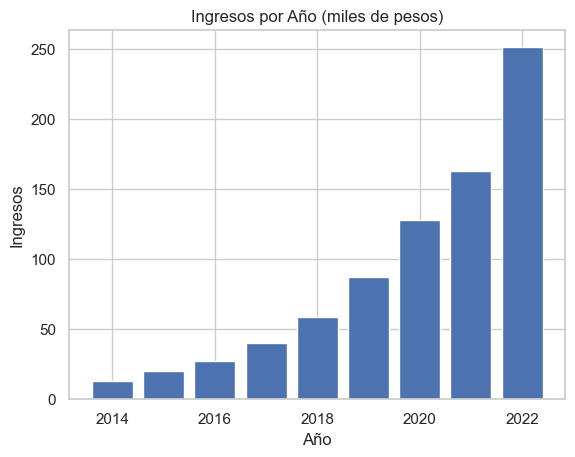

In [160]:
# Agrupar por año y sumar los ingresos
ingresos_por_año = df13.groupby('Año')['Ingresos (miles de pesos)'].sum().reset_index()

# Graficar barras
plt.bar(ingresos_por_año['Año'], ingresos_por_año['Ingresos (miles de pesos)'])
plt.xlabel('Año')
plt.ylabel('Ingresos')
plt.title('Ingresos por Año (miles de pesos)')
plt.show()


Se observa un crecimiento exponencial de ingresos, pero hay que ajustar los valores por inflacion, para hacer una comparacion real de ingresos por año

In [55]:
df14=pd.read_csv("data/14-AccesosaInternetfijoporvelocidaddebajadaylocalidad_2776171699377765205.csv")

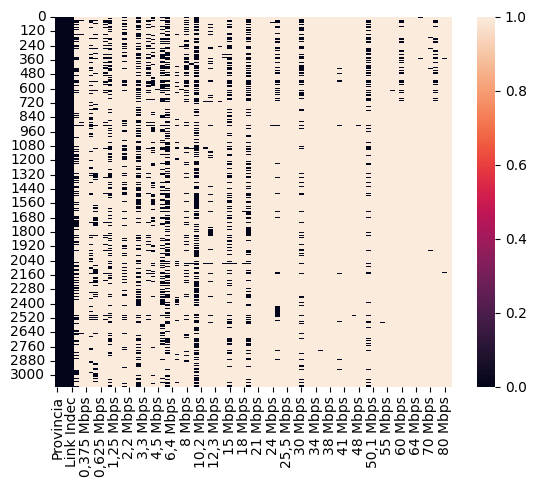

In [56]:
sns.heatmap(df14.isnull())
plt.show()

Se observan muchisimos nulos

In [164]:
df14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 83 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Provincia   3095 non-null   object 
 1   Partido     3095 non-null   object 
 2   Localidad   3095 non-null   object 
 3   Link Indec  3095 non-null   object 
 4   Otros       962 non-null    float64
 5   0,256 Mbps  28 non-null     float64
 6   0,375 Mbps  1 non-null      float64
 7   0,5 Mbps    643 non-null    float64
 8   0,512 Mbps  523 non-null    float64
 9   0,625 Mbps  1 non-null      float64
 10  0,75 Mbps   284 non-null    float64
 11  1 Mbps      891 non-null    float64
 12  1,25 Mbps   1 non-null      float64
 13  1,5 Mbps    15 non-null     float64
 14  2 Mbps      722 non-null    float64
 15  2,2 Mbps    1 non-null      float64
 16  2,5 Mbps    4 non-null      float64
 17  3 Mbps      1351 non-null   float64
 18  3,3 Mbps    1 non-null      float64
 19  3,5 Mbps    373 non-null   

In [60]:
df14.fillna(0,inplace=True)

In [61]:
df12["0,5 Mbps"].sum()

68120.899

In [167]:
#controlo valores conocidos , no me da con respecto a la otra tabla
df14["0,5 Mbps"].sum()

2662.866

Esta tabla no la necesito para mi analisis, ya que esta muy discriminada por velocidad, de lo cual no voy a hacer hincapié